# Problem Statement

classify the Size_Categorie using SVM
<br>
<br>month &emsp; month of the year: 'jan' to 'dec'
<br>day&emsp;	day of the week: 'mon' to 'sun'
<br>FFMC &emsp;	FFMC index from the FWI system: 18.7 to 96.20
<br>DMC &emsp;	DMC index from the FWI system: 1.1 to 291.3
<br>DC &emsp;	DC index from the FWI system: 7.9 to 860.6
<br>ISI &emsp;	ISI index from the FWI system: 0.0 to 56.10
<br>temp &emsp;	temperature in Celsius degrees: 2.2 to 33.30
<br>RH &emsp;	relative humidity in %: 15.0 to 100
<br>wind &emsp;	wind speed in km/h: 0.40 to 9.40
<br>rain &emsp;	outside rain in mm/m2 : 0.0 to 6.4
<br>Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
ff = pd.read_csv('forestfires.csv')
ff.head(6)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
ff.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
ff.shape

(517, 31)

<Axes: xlabel='month', ylabel='count'>

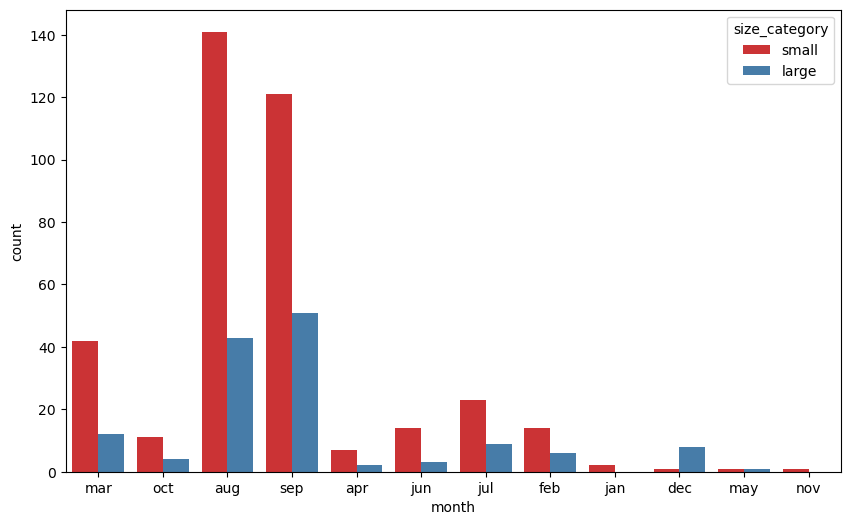

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'month', hue = 'size_category', data = ff, palette='Set1')

<Axes: xlabel='day', ylabel='count'>

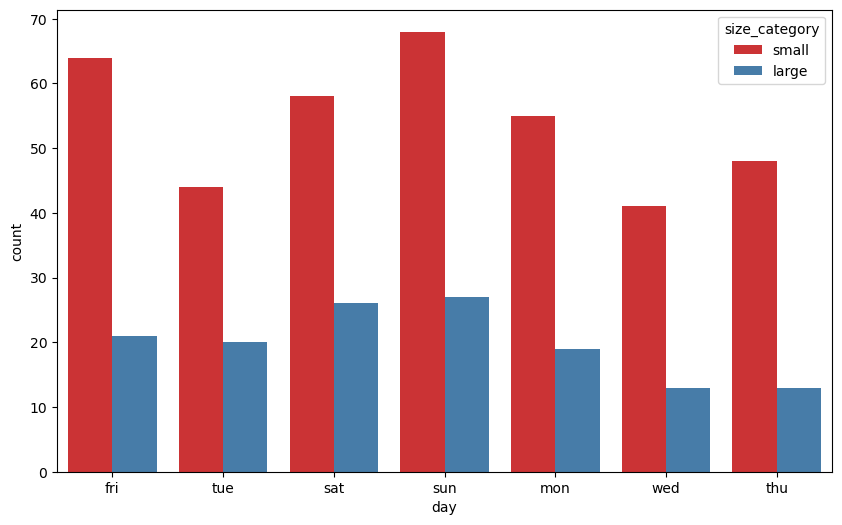

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'day', hue = 'size_category', data = ff, palette='Set1')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

ff["month"] = le.fit_transform(ff["month"])
ff["day"] = le.fit_transform(ff["day"])
ff["size_category"] = le.fit_transform(ff["size_category"])

In [10]:
ff.head(6)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
x = ff.iloc[:,:-1]
y = ff['size_category']

In [12]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [14]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[ 2.84222252e-01, -1.42312073e+00, -8.05959472e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 9.70871338e-01,  1.17671466e+00, -8.10203395e-03, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [ 9.70871338e-01, -3.83186570e-01, -8.10203395e-03, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.08907592e+00,  1.36780508e-01, -1.64008316e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-1.08907592e+00, -3.83186570e-01,  6.80956663e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 7.41988309e-01,  1.17671466e+00, -2.02087875e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

# SVC Model

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=143)

In [16]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((387, 30), (387,), (130, 30), (130,))

In [17]:
svc = SVC(kernel='poly')

svc.fit(xtrain,ytrain)

ypred = svc.predict(xtest)

In [18]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.40      0.14      0.21        28
           1       0.80      0.94      0.86       102

    accuracy                           0.77       130
   macro avg       0.60      0.54      0.54       130
weighted avg       0.71      0.77      0.72       130



In [19]:
print(svc.score(xtrain, ytrain))
print(svc.score(xtest,ytest))

0.772609819121447
0.7692307692307693


# Improving Model by Grid Search CV

In [20]:
svc = SVC()

param = {
    'C':[0.1,0.001,0.0001,10],
    'kernel':["linear","rbf","poly"],
    'gamma':[0.1,0.001,1]
}

In [21]:
grid = GridSearchCV(SVC(), param_grid=param, refit = True, verbose = 3,  cv = 5)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.821 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.821 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.792 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.792 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.782 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 10],
                         'gamma': [0.1, 0.001, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [22]:
grid.best_estimator_

SVC(C=10, gamma=0.1, kernel='linear')

In [23]:
svc = SVC(C= 10, kernel='linear', gamma=0.1)

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

In [24]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.98      0.97      0.98       102

    accuracy                           0.96       130
   macro avg       0.94      0.95      0.94       130
weighted avg       0.96      0.96      0.96       130



In [25]:
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.9844961240310077
0.9615384615384616
